# Revenue by Genre

In [1]:
import pandas as pd
import get_imdb as gi
import clean_data as imd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from statsmodels.graphics.mosaicplot import mosaic
import pylab
from itertools import product
import numpy as np
%matplotlib inline
sns.set()

In [2]:
imdb = gi.get_imdb()

In [3]:
tn = imd.tn_movie_budgets()

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Volumes/GoogleDrive/My Drive/Personal/Flatiron Data Science Bootcamp/Repostories/mod_1_project/clean_data.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_cutoff['start_year'] = df_cutoff.release_date.dt.year


In [4]:
combined = imd.movies_combined()

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Volumes/GoogleDrive/My Drive/Personal/Flatiron Data Science Bootcamp/Repostories/mod_1_project/clean_data.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_cutoff['start_year'] = df_cutoff.release_date.dt.year


In [5]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1410
Data columns (total 32 columns):
tconst               1338 non-null object
primary_title        1338 non-null object
original_title       1338 non-null object
start_year           1338 non-null int64
runtime_minutes      1333 non-null float64
genres               1338 non-null object
action               1338 non-null int64
crime                1338 non-null int64
drama                1338 non-null int64
biography            1338 non-null int64
comedy               1338 non-null int64
fantasy              1338 non-null int64
horror               1338 non-null int64
thriller             1338 non-null int64
adventure            1338 non-null int64
animation            1338 non-null int64
documentary          1338 non-null int64
history              1338 non-null int64
mystery              1338 non-null int64
sci_fi               1338 non-null int64
romance              1338 non-null int64
family               1338 

## Analysis

### genres

In [209]:
# add the genre_count variable to combined
combined['genre_count'] = combined.genres.map(lambda x: int(len(x)))
#create list of genres
genre_list = list(combined.loc[:,'Action':'Short'].keys())
#create dict of genres with value = 0
genre_dict = {}

for genre in genre_list:
    genre_dict[genre] = []
    genre_dict[genre].append (combined[genre].sum())
    genre_dict[genre].append (combined[combined[genre]==1]['domestic_gross'].sum())
    genre_dict[genre].append ((combined[combined[genre]==1]['domestic_gross'] / combined[combined[genre]==1]['genre_count']).sum())

#convert to df
genre_df = pd.DataFrame.from_dict(genre_dict, orient= 'index', columns = ['count', 'domestic_gross', 'domestic_gross_dltd'])
genre_df.reset_index(inplace = True)
genre_df.rename(columns = {'index': 'genre'},inplace = True)
# genre_df

### Revenue over time

In [227]:
# combined['start_year']

In [235]:
#create list of relevant years
year_list = list(range(2010,2020))
#create dict of genres with value = 0
year_dict = {}

for year in year_list:
    year_dict[year] = []
    year_dict[year].append ((combined[combined['start_year'] == year ]['domestic_gross']).sum())
    year_dict[year].append ((combined[combined['start_year'] == year ]['worldwide_gross']).sum())
    
#convert to df
year_df = pd.DataFrame.from_dict(year_dict, orient= 'index', columns = ['domestic_gross', 'worldwide_gross'])
year_df.reset_index(inplace = True)
year_df.rename(columns = {'index': 'year'},inplace = True)
year_df['foreign_gross'] = year_df['worldwide_gross'] - year_df['domestic_gross']

year_df

,year,domestic_gross,worldwide_gross,foreign_gross
0,2010,1.395950e+10,3.204429e+10,1.808479e+10
1,2011,1.522121e+10,3.701002e+10,2.178881e+10
2,2012,1.522425e+10,3.647924e+10,2.125499e+10
3,2013,1.513279e+10,3.530295e+10,2.017016e+10
4,2014,1.611389e+10,3.805400e+10,2.194012e+10
5,2015,1.438778e+10,3.293069e+10,1.854291e+10
6,2016,1.720483e+10,3.906464e+10,2.185981e+10
7,2017,1.512942e+10,3.668869e+10,2.155928e+10
8,2018,1.657450e+10,3.906025e+10,2.248575e+10
9,2019,6.396152e+09,1.287711e+10,6.480954e+09


## Visualizations

### US Revenue by Genre

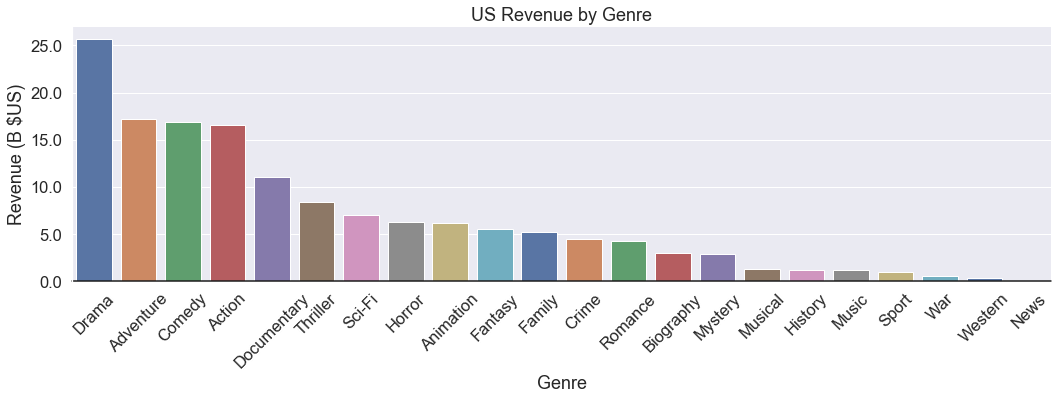

In [274]:
# Set up the matplotlib figure
f, ax1 = plt.subplots(1, 1, figsize=(15, 5), sharex=True)
# plot = sns.barplot(x = 'genre', y = 'domestic_gross_dltd', data = genre_df.sort_values(by='domestic_gross_dltd', ascending=False))

#Add Data
sns.barplot(x = 'genre', y = 'domestic_gross_dltd', data = genre_df[genre_df.domestic_gross_dltd > 0].sort_values(by='domestic_gross_dltd', ascending=False), ax=ax1, palette="deep")

#Add Attributues
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Revenue (B $US)")
ax1.set_xlabel("Genre")
ax1.set_title("US Revenue by Genre")

sns.despine(bottom=True)
# plt.setp(f.axes, yticks=[])  #adds / removes y-axis ticks
plt.tight_layout(h_pad=2)
plt.xticks(rotation=45)

# ylabels = ['{:,.2f}'.format(y) + 'K' for y in ax1.get_xticks()/1000000]
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)/10**9)))

#make font larger
sns.set(font_scale=1.5)

#show plot
plt.show()

### Visualization revenue over time stacked bar

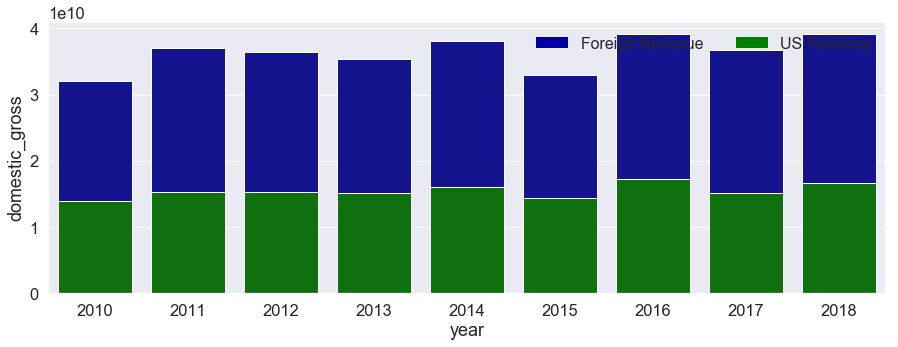

In [272]:
#Set general plot properties
f, ax1 = plt.subplots(1, 1, figsize=(15, 5), sharex=True)

#Plot 1 - background - "total" (top) series
# sns.barplot(x = stacked_bar_data.Group, y = stacked_bar_data.total, , color = "red")
sns.barplot(x = 'year', y = 'worldwide_gross', data = year_df[year_df['year'] < 2019], ax=ax1, color='#0000A3')

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = 'year', y = 'domestic_gross', data = year_df[year_df['year'] < 2019], ax=ax1, color="green")
# bottom_plot = sns.barplot(x = stacked_bar_data.Group, y = stacked_bar_data.Series1, color = "#0000A3")

topbar = plt.Rectangle((0,0),1,1,fc="green", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Foreign Revenue', 'US Revenue'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
# sns.despine(left=True)
# bottom_plot.set_ylabel("Y-axis label")
# bottom_plot.set_xlabel("X-axis label")

#Set fonts to consistent 16pt size
# for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
#              bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
#     item.set_fontsize(16)

plt.show()